'''
    Programul foloseste urmatoarele librarii:
        -pandas pentru a lucra cu fisiare csv si dataframe
        -numpy pentru a lucra cu numpy array-uri(matrici bidimensionale)
        -os pentru lucurl cu fisiere, verificarea existentei sau stergerea de fisiere
        -matplotlib pentru reprezentari grafice
        -tensorflow si tfts pentru crearea modelului RNN
    
    TFTS (TensorFlow Time Series) este un pachet Python proiectat pentru lucrul cu serii de timp. Acesta ofera un cadru flexibil si puternic pentru rezolvarea sarcinilor legate de analiza seriilor de timp, inclusiv metode clasice si cele mai recente metode de invatare profunda utilizand TensorFlow sau Keras.

    Caracteristici cheie ale TFTS includ:

        - Design flexibil si puternic pentru sarcinile legate de serii de timp.
        - Modele avansate de invatare profunda potrivite pentru industrie, cercetare si competitii.
        - Suport pentru TensorFlow si Keras, doua biblioteci populare de invatare automata si profunda in Python.
'''

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf


In [2]:
df = pd.read_csv(r"C:\Users\silviu.musat\Documents\ftir\inputspectre.csv",sep='\t')

In [3]:
df

,Filename,E0,interval,E0-Idx,Width,Prominence
0,8-GO-BPZ_1.asc,4000.0,"[109.099009, 109.101216, 109.09833, 109.088991...",3999.0,0.882363,0.002207
1,8-GO-BPZ_1.asc,3999.0,"[109.101216, 109.09833, 109.088991, 109.07499,...",3989.0,1.248466,0.001912
2,8-GO-BPZ_1.asc,3998.0,"[109.09833, 109.088991, 109.07499, 109.060975,...",3989.0,1.248466,0.001912
3,8-GO-BPZ_1.asc,3997.0,"[109.088991, 109.07499, 109.060975, 109.050955...",3989.0,1.248466,0.001912
4,8-GO-BPZ_1.asc,3996.0,"[109.07499, 109.060975, 109.050955, 109.045466...",3989.0,1.248466,0.001912
...,...,...,...,...,...,...
41647,sticla nedepusa_1.asc,534.0,"[91.630816, 91.574073, 91.508763, 91.440696, 9...",534.0,0.000000,0.000000
41648,sticla nedepusa_1.asc,533.0,"[91.574073, 91.508763, 91.440696, 91.37162, 91...",533.0,0.000000,0.000000
41649,sticla nedepusa_1.asc,532.0,"[91.508763, 91.440696, 91.37162, 91.290943, 91...",532.0,0.000000,0.000000
41650,sticla nedepusa_1.asc,531.0,"[91.440696, 91.37162, 91.290943, 91.199496, 91...",433.0,1.328321,0.340286


In [4]:
dfdata=df['interval']


In [5]:
dfdata

0        [109.099009, 109.101216, 109.09833, 109.088991...
1        [109.101216, 109.09833, 109.088991, 109.07499,...
2        [109.09833, 109.088991, 109.07499, 109.060975,...
3        [109.088991, 109.07499, 109.060975, 109.050955...
4        [109.07499, 109.060975, 109.050955, 109.045466...
                               ...                        
41647    [91.630816, 91.574073, 91.508763, 91.440696, 9...
41648    [91.574073, 91.508763, 91.440696, 91.37162, 91...
41649    [91.508763, 91.440696, 91.37162, 91.290943, 91...
41650    [91.440696, 91.37162, 91.290943, 91.199496, 91...
41651    [91.37162, 91.290943, 91.199496, 91.116521, 91...
Name: interval, Length: 41652, dtype: object

In [6]:
interval_array = df['interval'].values

print(interval_array)

['[109.099009, 109.101216, 109.09833, 109.088991, 109.07499, 109.060975, 109.050955, 109.045466, 109.042711, 109.041694, 109.042512, 109.043606, 109.041054, 109.032315, 109.019937, 109.010094, 109.007085, 109.009705, 109.013362, 109.014996, 109.014937, 109.014472, 109.013342, 109.010502, 109.00598, 109.000845, 108.995598, 108.989586, 108.982261, 108.974159, 108.966256, 108.95883, 108.952077, 108.94723, 108.94572, 108.947005, 108.947936, 108.945663, 108.94088, 108.9363, 108.932378, 108.926929, 108.919946, 108.915778, 108.91883, 108.927815, 108.935975, 108.937719, 108.934271, 108.932513, 108.937234, 108.945903, 108.952269, 108.953383, 108.950402, 108.944082, 108.93406, 108.922496, 108.913626, 108.90869, 108.904437, 108.896914, 108.887353, 108.881879, 108.884265, 108.890266, 108.891169, 108.884224, 108.876083, 108.874345, 108.878991, 108.884933, 108.887375, 108.881543, 108.866094, 108.849864, 108.845515, 108.854289, 108.863413, 108.860673, 108.846986, 108.831512, 108.819042, 108.807747, 1

In [7]:
import ast

In [8]:

interval_arrays = df['interval'].apply(lambda x: np.array(ast.literal_eval(x)))

print(interval_arrays)

0        [109.099009, 109.101216, 109.09833, 109.088991...
1        [109.101216, 109.09833, 109.088991, 109.07499,...
2        [109.09833, 109.088991, 109.07499, 109.060975,...
3        [109.088991, 109.07499, 109.060975, 109.050955...
4        [109.07499, 109.060975, 109.050955, 109.045466...
                               ...                        
41647    [91.630816, 91.574073, 91.508763, 91.440696, 9...
41648    [91.574073, 91.508763, 91.440696, 91.37162, 91...
41649    [91.508763, 91.440696, 91.37162, 91.290943, 91...
41650    [91.440696, 91.37162, 91.290943, 91.199496, 91...
41651    [91.37162, 91.290943, 91.199496, 91.116521, 91...
Name: interval, Length: 41652, dtype: object


In [9]:
dfdata_filtered = []
for row in dfdata:
    arr_str = row  # Assuming row is a string representation of the array
    arr = np.fromstring(arr_str[1:-1], sep=',')  # Convert string to numpy array
    if arr.size > 0:  # Skip empty or singleton arrays
        dfdata_filtered.append(arr.reshape( 100))

In [10]:
dfdata_filtered

[array([109.099009, 109.101216, 109.09833 , 109.088991, 109.07499 ,
        109.060975, 109.050955, 109.045466, 109.042711, 109.041694,
        109.042512, 109.043606, 109.041054, 109.032315, 109.019937,
        109.010094, 109.007085, 109.009705, 109.013362, 109.014996,
        109.014937, 109.014472, 109.013342, 109.010502, 109.00598 ,
        109.000845, 108.995598, 108.989586, 108.982261, 108.974159,
        108.966256, 108.95883 , 108.952077, 108.94723 , 108.94572 ,
        108.947005, 108.947936, 108.945663, 108.94088 , 108.9363  ,
        108.932378, 108.926929, 108.919946, 108.915778, 108.91883 ,
        108.927815, 108.935975, 108.937719, 108.934271, 108.932513,
        108.937234, 108.945903, 108.952269, 108.953383, 108.950402,
        108.944082, 108.93406 , 108.922496, 108.913626, 108.90869 ,
        108.904437, 108.896914, 108.887353, 108.881879, 108.884265,
        108.890266, 108.891169, 108.884224, 108.876083, 108.874345,
        108.878991, 108.884933, 108.887375, 108.

In [11]:
pred_list = []

In [12]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, SimpleRNN

# Define the RNN model
def build_rnn_model():
    model = Sequential([
        Embedding(input_dim=3570, output_dim=128, input_length=100),
        LSTM(units=128, return_sequences=False),
        Dense(units=100)  # Change the activation function as needed
    ])
    return model

# Build the model
model = build_rnn_model()

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mse'])

# Print model summary
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 128)          456960    
                                                                 
 lstm (LSTM)                 (None, 128)               131584    
                                                                 
 dense (Dense)               (None, 100)               12900     
                                                                 
Total params: 601,444
Trainable params: 601,444
Non-trainable params: 0
_________________________________________________________________


In [13]:
# Create input data and labels
inputs = dfdata_filtered[:-1]  # All elements except the last one
labels = dfdata_filtered[1:]   # All elements except the first one

# Define a function to generate batches
def generate_batches(inputs, labels, batch_size):
    # Combine inputs and labels into a dataset
    dataset = tf.data.Dataset.from_tensor_slices((inputs, labels))
    
    # Batch the dataset
    dataset = dataset.batch(batch_size)
    
    return dataset

# Example usage:
batch_size = 1  # Set your desired batch size

# Generate the dataset
dataset = generate_batches(inputs, labels, batch_size)

# Split the dataset into training and validation sets
validation_split = 0.25  # Set the validation split ratio
validation_size = int(len(inputs) * validation_split)

# Create training and validation datasets
train_dataset = dataset.skip(validation_size)
validation_dataset = dataset.take(validation_size)


model.fit(train_dataset,validation_data=validation_dataset, epochs=18)

Epoch 1/18
31239/31239 [==============================] - 342s 11ms/step - loss: 117.5238 - mse: 117.5238 - val_loss: 158.6293 - val_mse: 158.6293
Epoch 2/18
31239/31239 [==============================] - 336s 11ms/step - loss: 3.5598 - mse: 3.5598 - val_loss: 187.3265 - val_mse: 187.3265
Epoch 3/18
31239/31239 [==============================] - 331s 11ms/step - loss: 1.7119 - mse: 1.7119 - val_loss: 254.1006 - val_mse: 254.1006
Epoch 4/18
31239/31239 [==============================] - 327s 10ms/step - loss: 1.6062 - mse: 1.6062 - val_loss: 204.8352 - val_mse: 204.8352
Epoch 5/18
31239/31239 [==============================] - 328s 10ms/step - loss: 1.1220 - mse: 1.1220 - val_loss: 149.8664 - val_mse: 149.8664
Epoch 6/18
31239/31239 [==============================] - 332s 11ms/step - loss: 1.4503 - mse: 1.4503 - val_loss: 76.4881 - val_mse: 76.4881
Epoch 7/18
31239/31239 [==============================] - 325s 10ms/step - loss: 1.0217 - mse: 1.0217 - val_loss: 63.5880 - val_mse: 63.5880

In [18]:
model.fit(train_dataset,validation_data=validation_dataset, epochs=100)

Epoch 1/100
31239/31239 [==============================] - 333s 11ms/step - loss: 0.8020 - mse: 0.8020 - val_loss: 14.4486 - val_mse: 14.4486
Epoch 2/100
31239/31239 [==============================] - 337s 11ms/step - loss: 0.6755 - mse: 0.6755 - val_loss: 10.6277 - val_mse: 10.6277
Epoch 3/100
31239/31239 [==============================] - 324s 10ms/step - loss: 0.6225 - mse: 0.6225 - val_loss: 11.3314 - val_mse: 11.3314
Epoch 4/100
31239/31239 [==============================] - 330s 11ms/step - loss: 0.6971 - mse: 0.6971 - val_loss: 23.9118 - val_mse: 23.9118
Epoch 5/100
31239/31239 [==============================] - 336s 11ms/step - loss: 0.7015 - mse: 0.7015 - val_loss: 14.0149 - val_mse: 14.0149
Epoch 6/100
31239/31239 [==============================] - 337s 11ms/step - loss: 0.7547 - mse: 0.7547 - val_loss: 14.3105 - val_mse: 14.3105
Epoch 7/100
31239/31239 [==============================] - 334s 11ms/step - loss: 0.7588 - mse: 0.7588 - val_loss: 14.6936 - val_mse: 14.6936
Epoch 

31239/31239 [==============================] - 326s 10ms/step - loss: 0.6385 - mse: 0.6385 - val_loss: 14.8649 - val_mse: 14.8649
Epoch 59/100
31239/31239 [==============================] - 329s 11ms/step - loss: 0.6619 - mse: 0.6619 - val_loss: 18.3545 - val_mse: 18.3545
Epoch 60/100
31239/31239 [==============================] - 327s 10ms/step - loss: 0.7302 - mse: 0.7302 - val_loss: 12.9006 - val_mse: 12.9006
Epoch 61/100
31239/31239 [==============================] - 330s 11ms/step - loss: 0.6742 - mse: 0.6742 - val_loss: 9.6520 - val_mse: 9.6520
Epoch 62/100
31239/31239 [==============================] - 330s 11ms/step - loss: 0.5993 - mse: 0.5993 - val_loss: 8.5168 - val_mse: 8.5168
Epoch 63/100
31239/31239 [==============================] - 329s 11ms/step - loss: 0.5901 - mse: 0.5901 - val_loss: 7.9509 - val_mse: 7.9509
Epoch 64/100
31239/31239 [==============================] - 330s 11ms/step - loss: 0.6087 - mse: 0.6087 - val_loss: 9.8333 - val_mse: 9.8333
Epoch 65/100
31239/3

In [14]:
model.history.history

{'loss': [117.52375793457031,
  3.559835195541382,
  1.711876630783081,
  1.6061606407165527,
  1.1219946146011353,
  1.4502640962600708,
  1.0216902494430542,
  1.088712215423584,
  0.9030755758285522,
  0.7859947681427002,
  0.7613568305969238,
  0.8715027570724487,
  0.6760983467102051,
  0.7473355531692505,
  1.3067015409469604,
  1.0893419981002808,
  0.7240720987319946,
  1.2340893745422363],
 'mse': [117.52375793457031,
  3.559835195541382,
  1.711876630783081,
  1.6061606407165527,
  1.1219946146011353,
  1.4502640962600708,
  1.0216902494430542,
  1.088712215423584,
  0.9030755758285522,
  0.7859947681427002,
  0.7613568305969238,
  0.8715027570724487,
  0.6760983467102051,
  0.7473355531692505,
  1.3067015409469604,
  1.0893419981002808,
  0.7240720987319946,
  1.2340893745422363],
 'val_loss': [158.6293487548828,
  187.3264923095703,
  254.10064697265625,
  204.83522033691406,
  149.8663787841797,
  76.48806762695312,
  63.58799362182617,
  103.84565734863281,
  37.615550994

In [19]:
history=model.history.history

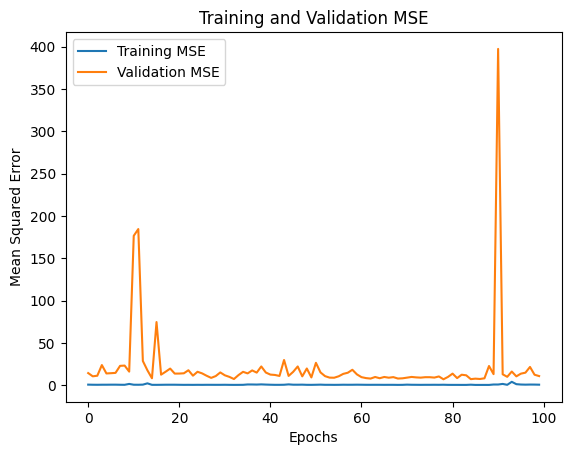

In [23]:
import matplotlib.pyplot as plt
plt.plot(history['loss'], label='Training MSE')
plt.plot(history['val_loss'], label='Validation MSE')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.title('Training and Validation MSE')
plt.legend()
plt.show()

In [25]:
model.save('model.h5')

In [26]:
model2= tf.keras.models.load_model('model.h5')

In [27]:
inputs

[array([109.099009, 109.101216, 109.09833 , 109.088991, 109.07499 ,
        109.060975, 109.050955, 109.045466, 109.042711, 109.041694,
        109.042512, 109.043606, 109.041054, 109.032315, 109.019937,
        109.010094, 109.007085, 109.009705, 109.013362, 109.014996,
        109.014937, 109.014472, 109.013342, 109.010502, 109.00598 ,
        109.000845, 108.995598, 108.989586, 108.982261, 108.974159,
        108.966256, 108.95883 , 108.952077, 108.94723 , 108.94572 ,
        108.947005, 108.947936, 108.945663, 108.94088 , 108.9363  ,
        108.932378, 108.926929, 108.919946, 108.915778, 108.91883 ,
        108.927815, 108.935975, 108.937719, 108.934271, 108.932513,
        108.937234, 108.945903, 108.952269, 108.953383, 108.950402,
        108.944082, 108.93406 , 108.922496, 108.913626, 108.90869 ,
        108.904437, 108.896914, 108.887353, 108.881879, 108.884265,
        108.890266, 108.891169, 108.884224, 108.876083, 108.874345,
        108.878991, 108.884933, 108.887375, 108.

In [35]:
X_pred=inputs[:1]

In [38]:
model.predict(train_dataset)

31239/31239 [==============================] - 139s 4ms/step


array([[ 91.896835,  91.982216,  92.066925, ...,  81.875084,  81.68881 ,
         81.5057  ],
       [111.808784, 111.84331 , 111.810074, ..., 108.58364 , 108.62635 ,
        108.68265 ],
       [111.808784, 111.84331 , 111.810074, ..., 108.58364 , 108.62635 ,
        108.68265 ],
       ...,
       [ 91.93467 ,  91.846954,  91.748825, ...,  77.49019 ,  77.31459 ,
         77.16117 ],
       [ 91.9509  ,  91.86311 ,  91.76494 , ...,  77.50768 ,  77.33181 ,
         77.178276],
       [ 91.94926 ,  91.86147 ,  91.76329 , ...,  77.50489 ,  77.32911 ,
         77.17564 ]], dtype=float32)

In [15]:
'''import tensorflow as tf
import tfts
from tfts import AutoModel, AutoConfig,KerasTrainer
import numpy as np
import matplotlib.pyplot as plt
config = AutoConfig('rnn').get_config()
print(config)

custom_model_params = {
    "rnn_size": 128,
    "dense_size": 128,
}


predict_length = 100
model1 = AutoModel('rnn', predict_length=predict_length, custom_model_params=custom_model_params)
trainer = KerasTrainer(model)
for i in range(len(dfdata_filtered) - 1):
    x_train = dfdata_filtered[i]
    y_train = dfdata_filtered[i+1]
    x_valid = dfdata_filtered[i]
    y_valid = dfdata_filtered[i+1]
    trainer.train((x_train, y_train), (x_valid, y_valid), n_epochs=10)

    pred = trainer.predict(x_valid)
    trainer.plot(history=x_valid, true=y_valid, pred=pred)
    plt.show()
    pred = pred.numpy()
    pred = pred.tolist()
    pred_list.append(pred) '''

'import tensorflow as tf\nimport tfts\nfrom tfts import AutoModel, AutoConfig,KerasTrainer\nimport numpy as np\nimport matplotlib.pyplot as plt\nconfig = AutoConfig(\'rnn\').get_config()\nprint(config)\n\ncustom_model_params = {\n    "rnn_size": 128,\n    "dense_size": 128,\n}\n\n\npredict_length = 100\nmodel1 = AutoModel(\'rnn\', predict_length=predict_length, custom_model_params=custom_model_params)\ntrainer = KerasTrainer(model)\nfor i in range(len(dfdata_filtered) - 1):\n    x_train = dfdata_filtered[i]\n    y_train = dfdata_filtered[i+1]\n    x_valid = dfdata_filtered[i]\n    y_valid = dfdata_filtered[i+1]\n    trainer.train((x_train, y_train), (x_valid, y_valid), n_epochs=10)\n\n    pred = trainer.predict(x_valid)\n    trainer.plot(history=x_valid, true=y_valid, pred=pred)\n    plt.show()\n    pred = pred.numpy()\n    pred = pred.tolist()\n    pred_list.append(pred) '

In [16]:
'''energy_list=df['E0'].tolist()
energy_list = energy_list[:-1]
dfrnn = pd.DataFrame({'E0': energy_list, 'interval': pred_list})
dfrnn.to_csv('outputrnn.csv',sep='\t', index=False) '''

"energy_list=df['E0'].tolist()\nenergy_list = energy_list[:-1]\ndfrnn = pd.DataFrame({'E0': energy_list, 'interval': pred_list})\ndfrnn.to_csv('outputrnn.csv',sep='\t', index=False) "

In [17]:
'''
Modelul ce foloseste libraria tfts se bazeaza pe:
@misc{tfts2020,
  author = {Longxing Tan},
  title = {Time series prediction},
  year = {2020},
  publisher = {GitHub},
  journal = {GitHub repository},
  howpublished = {\url{https://github.com/longxingtan/time-series-prediction}},
}
''' 

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 222-223: truncated \uXXXX escape (3478766628.py, line 11)